In [1]:
import pylab as plt 
import pandas as pd
import numpy as np
from astropy.constants import R_earth, m_e, c
from astropy import units
from tqdm import tqdm
from scipy.constants import elementary_charge

In [2]:
from plotting_utils import add_earth

In [22]:
def plot(df_sub, fname=None):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'z{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Z (SM)')
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    plt.xlim(-1, 7)
    plt.ylim(-3, 3)
    add_earth()
    plt.gca().set_aspect("equal")
        
    plt.subplot(122)
    cmap = plt.get_cmap('viridis')
    for i in [0]:#range(50, 500, 50):
        plt.scatter(df_sub[f'x{i}'], df_sub[f'y{i}'], c=cmap(np.linspace(0, 1, len(df_sub.index))))

    plt.xlabel('X (SM)')
    plt.ylabel('Y (SM)')
    plt.xlim(-1, 7)
    plt.ylim(-7, 7)
    plt.axhline(0, color='k')
    plt.axvline(0, color='k')
    add_earth()
    plt.gca().set_aspect("equal")
    
    if fname:
        plt.savefig(fname)
        plt.close()


In [34]:
df = pd.read_csv('data/test_lfm.csv')
print(len(df.index))

23


In [35]:
df

,Unnamed: 0,t0,x0,y0,z0,ppar0,B0,W0,h0,t50,...,W400,h400,t450,x450,y450,z450,ppar450,B450,W450,h450
0,0,1.320260,5.980273,0.008621,0.313595,0.405746,-13.094808,0.217041,0.150816,1.320418,...,0.216394,0.151021,1.321678,5.993782,0.008637,0.314128,0.405771,-13.020695,0.216313,0.151046
1,1,2.858724,5.905095,0.018180,0.666347,0.395692,-13.428015,0.217040,0.156202,2.859144,...,0.216390,0.156412,2.862508,5.918546,0.018231,0.667704,0.395787,-13.351371,0.216309,0.156438
2,2,4.439973,5.777061,0.026960,0.999898,0.375550,-14.078650,0.217120,0.161044,4.440635,...,0.216286,0.161210,4.445944,5.790341,0.027040,1.002130,0.375878,-13.976176,0.216203,0.161231
3,3,6.085536,5.606174,0.034697,1.302573,0.343292,-15.035853,0.217100,0.169968,6.086348,...,0.216445,0.170006,6.092774,5.619159,0.034795,1.305748,0.343999,-14.941634,0.216364,0.170011
4,4,7.855121,5.402088,0.041571,1.565230,0.295371,-16.313205,0.217212,0.187674,7.855886,...,0.216556,0.187462,7.861743,5.414536,0.041680,1.569327,0.296593,-16.208970,0.216474,0.187346
5,5,9.870361,5.181682,0.047447,1.781566,0.220251,-17.940844,0.217464,0.224733,9.870610,...,0.216804,0.223879,9.871752,5.193248,0.047554,1.786636,0.222419,-17.826369,0.216722,0.223760
6,6,12.510531,4.982141,0.053686,1.936018,0.093137,-19.645258,0.218026,0.340214,12.508504,...,0.217355,0.336147,12.491158,4.991306,0.053732,1.942830,0.097389,-19.535796,0.217272,0.335610
7,7,17.093406,5.022101,0.068081,1.908250,-0.142279,-19.282149,0.219171,0.447481,17.108330,...,0.218449,0.462495,17.084428,5.017599,0.068268,1.924821,-0.133973,-19.296743,0.218374,0.463650
8,8,20.337583,5.330209,0.083911,1.648454,-0.286260,-16.803983,0.219906,0.230728,20.352121,...,0.219218,0.233933,20.421776,5.328468,0.084344,1.666777,-0.283345,-16.795959,0.219146,0.234230
9,9,22.373317,5.574308,0.097034,1.364050,-0.347839,-15.212663,0.220143,0.181614,22.387549,...,0.219446,0.182729,22.478678,5.575771,0.097561,1.383183,-0.346161,-15.187062,0.219412,0.182778


Text(0.5, 0, 'Time (seconds)')

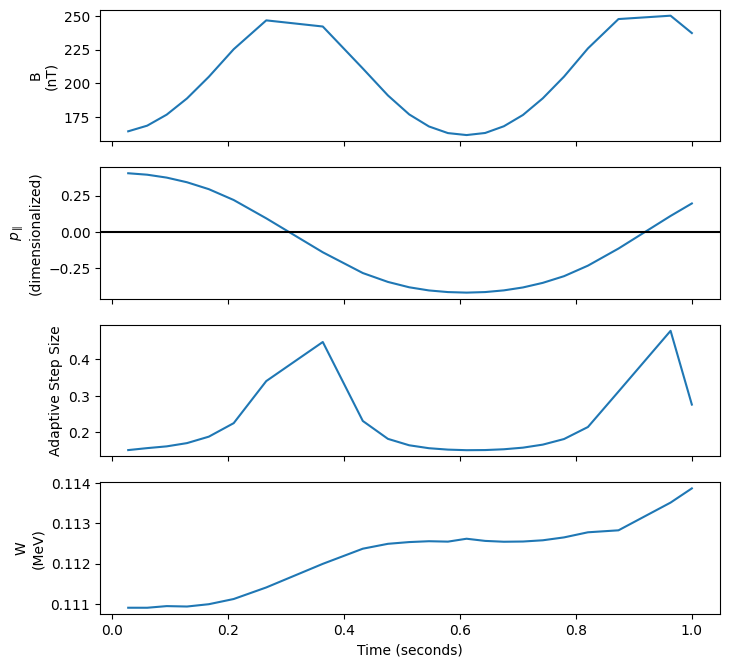

In [36]:
sf = c / R_earth
t = (df['t0'].values / sf).to(units.s).value

q = - elementary_charge * units.C
sf = (q * R_earth / (m_e * c**2))
B = (df['B0'].values * units.s/ R_earth / sf).to(units.nT)

p = df['ppar0'].values
W = (df['W0'].values * (m_e * c**2)).to(units.MeV).value
#print(df['W0'].values)
fig, axes = plt.subplots(4, 1,sharex=True, figsize=(8, 8), dpi=100)
axes[0].plot(t, B, '-')
axes[0].set_ylabel('B\n(nT)')
axes[1].plot(t, p, '-')
axes[1].set_ylabel(r'$p_\parallel$' +'\n(dimensionalized)')
axes[1].axhline(0, color='k')
axes[2].plot(t, df['h0'], '-')
axes[2].set_ylabel('Adaptive Step Size')
axes[3].plot(t, W, '-')
axes[3].set_ylabel('W\n(MeV)')
#axes[3].set_ylim(0, W.max() * 1.1)
axes[3].set_xlabel('Time (seconds)')

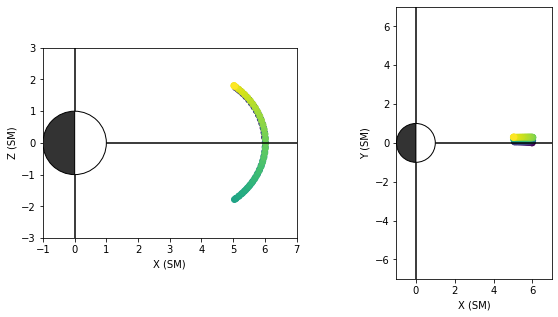

In [7]:
plot(df)

In [ ]:
import joblib
tasks = []

for i in range(len(df.index)):
    tasks.append(joblib.delayed(plot)(df.iloc[i:i+100], 'plots/%04d.png' % i))
    
print(f'Tasks: {len(tasks)}')

joblib.Parallel(n_jobs=-1, verbose=1)(tasks)

Tasks: 81671


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |